In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# Load protein interaction data
ppi_data = pd.read_csv('Human-PPI.txt', delim_whitespace=True, header=None, names=['protein1', 'protein2'])

# Load protein lists
protein_list1 = pd.read_csv('protein-list1.txt', header=None, names=['protein'])
protein_list2 = pd.read_csv('protein-list2.txt', header=None, names=['protein'])

# Combine protein lists
all_proteins = pd.concat([protein_list1, protein_list2]).drop_duplicates().reset_index(drop=True)
# Create a graph
G = nx.from_pandas_edgelist(ppi_data, 'protein1', 'protein2') # Calculate degrees and clustering coefficients
degrees = dict(G.degree())
clustering_coeffs = nx.clustering(G)
# Calculate average clustering coefficient
average_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering}")



Average Clustering Coefficient: 0.20978289398882888


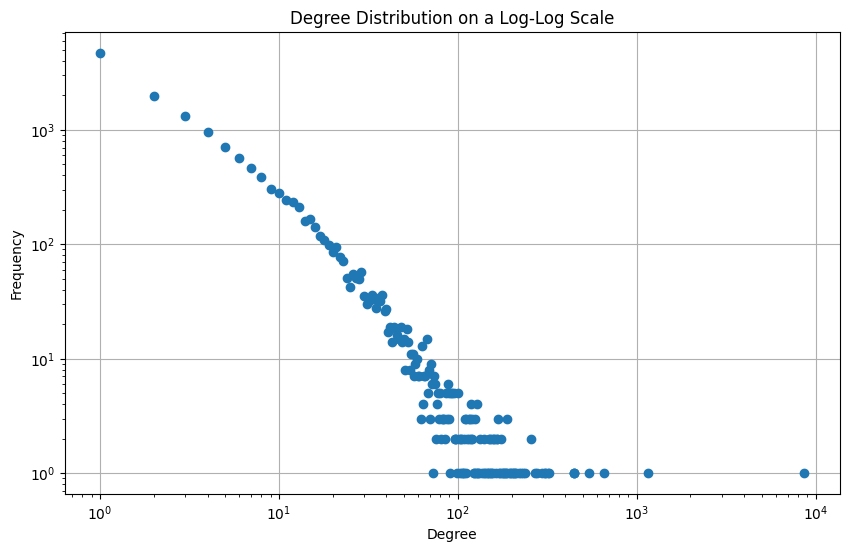

In [3]:
# Degree distribution
degrees = [deg for node, deg in G.degree()]
degree_count = pd.Series(degrees).value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.loglog(degree_count.index, degree_count.values, marker='o', linestyle='None')
plt.title('Degree Distribution on a Log-Log Scale')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy.stats import ranksums
import matplotlib.pyplot as plt     # Load protein interaction data
ppi_data = pd.read_csv('Human-PPI.txt', delim_whitespace=True, header=None, names=['protein1', 'protein2'])

# Load protein sets
protein_list1 = pd.read_csv('protein-list1.txt', header=None, names=['protein'])
protein_list2 = pd.read_csv('protein-list2.txt', header=None, names=['protein'])
G = nx.from_pandas_edgelist(ppi_data, 'protein1', 'protein2')
# Calculate shortest paths between all pairs
path_lengths = dict(nx.all_pairs_shortest_path_length(G))
# Function to extract path lengths within a set
def extract_path_lengths(path_lengths, protein_set):
    lengths = []
    proteins = protein_set['protein'].tolist()
    for protein in proteins:
        if protein in path_lengths:
            for target in proteins:
                if target in path_lengths[protein]:
                    lengths.append(path_lengths[protein][target])
    return lengths

# Extract path lengths for both sets
list1_lengths = extract_path_lengths(path_lengths, protein_list1)
list2_lengths = extract_path_lengths(path_lengths, protein_list2)
stat, p_value = ranksums(list1_lengths, list2_lengths)
print(f"Wilcoxon rank-sum test statistic: {stat}, p-value: {p_value}")

Wilcoxon rank-sum test statistic: 1.15437715853086, p-value: 0.24834557549999514


<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
